# Projected PCA

In [1]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

import os
import re

from seq_utils import letters_to_nums, sequences_from_fasta, one_hot_seq_batch
from PCA_func import plot_projected_pca, plot_pca_of_sequences, plot_two_pca_side_by_side, plot_projected_pca_mult, plot_projected_pca_time

Target PCA coordinates: [17.  5.]


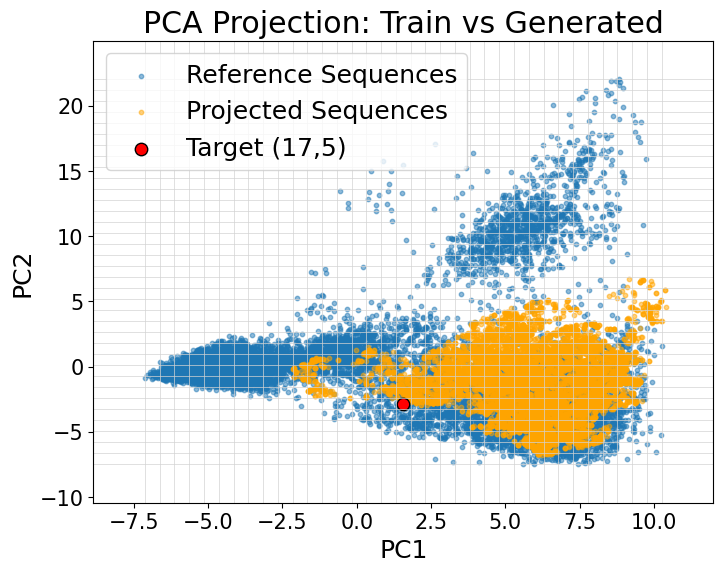

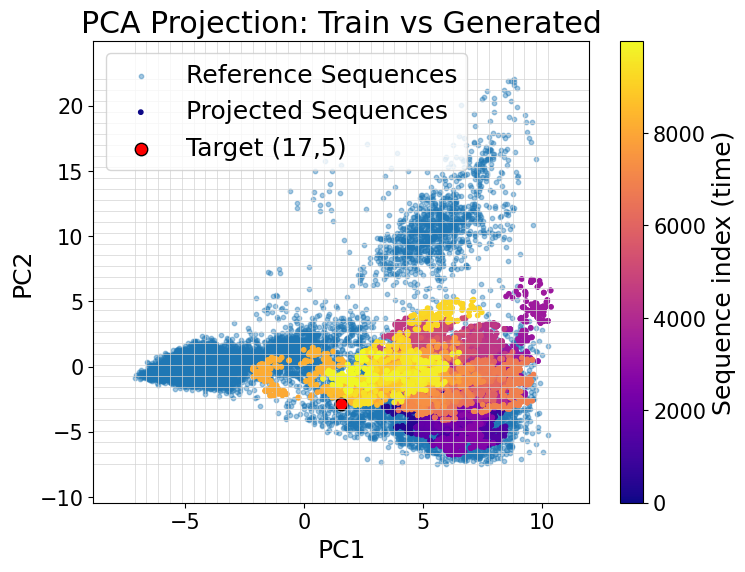

In [2]:
"""
    One-hot encode AA sequences - plm generated and true
"""
# -------------- Load generated sequences ----------------
file_dir='generated_sequencesPCA_comp17_5_'
filename = 'gen_seqs_w_init_seq_Ns15000_r0.4_b1PCA_comp'

cwd = os.getcwd()

# Load the generated sequences
output_file = cwd + f'/{file_dir}/{filename}.npy'
#output_file = cwd + f'\CODE\AttentionDCA_python\src\PLM\{file_dir}\{filename}.npy'
gen_sequences = np.load(output_file)
saved_seq = gen_sequences.copy()
# remove last two columns (PCA coords)
gen_sequences = gen_sequences[:, :-2]  # Assuming the last two columns are PCA coordinates
Ni = 5000
Nf = 30000
gen_sequences = gen_sequences[Ni:Nf]


# -------------- Load train sequences ----------------
# Load train sequences
family = 'jdoms_bacteria_train2'

wd = '/Users/marzioformica/Desktop/EPFL/Master/StageLBS/PCA_gen_AI'
filename = wd + f'/CODE/DataAttentionDCA/jdoms/{family}.fasta'

#filename = cwd + f'\CODE\DataAttentionDCA\jdoms\{family}.fasta'

train_sequences = sequences_from_fasta(filename)
train_sequences_num = [letters_to_nums(seq) for seq in train_sequences]

# take target coords from name file_dir - last two numbers
import re
# Extract target PCA coordinates from file_dir string
match = re.findall(r'\d+', file_dir[-10:])  # Only search at end of string
if len(match) >= 2:
    target_coords = np.array([float(match[-2]), float(match[-1])])
    print(f"Target PCA coordinates: {target_coords}")
else:
    raise ValueError("Could not extract two PCA coordinates from file_dir name.")
plot_projected_pca(sequences_reference=train_sequences, sequences_to_project=gen_sequences, title="PCA Projection: Train vs Generated", Nbins=35, target_coords=target_coords)
plot_projected_pca_time(sequences_reference=train_sequences, sequences_to_project=gen_sequences, title="PCA Projection: Train vs Generated", Nbins=35, target_coords=target_coords)

#plot_pca_of_sequences(train_sequences, title="PCA of Generated Sequences")

In [3]:
# ----- Paths -----
generated_dir = 'generated_sequences_2Model_PCAPCA_comp'
cwd = os.getcwd()
full_gen_path = os.path.join(cwd, generated_dir)

# ----- Load train sequences -----
family = 'jdoms_bacteria_train2'
train_fasta_path = '/Users/marzioformica/Desktop/EPFL/Master/StageLBS/PCA_gen_AI/CODE/DataAttentionDCA/jdoms/' + family + '.fasta'

train_sequences = sequences_from_fasta(train_fasta_path)
train_sequences_num = [letters_to_nums(seq) for seq in train_sequences]

# ----- Loop through all .npy files in directory -----
for file in os.listdir(full_gen_path):
    if file.endswith('.npy'):
        print(f"\nProcessing file: {file}")
        
        # Load generated sequences
        file_path = os.path.join(full_gen_path, file)
        gen_sequences = np.load(file_path)
        L=63
        if gen_sequences.shape[1] > L:
            target_coords = gen_sequences[0, -2:]  # Last two columns are PCA coords
            gen_sequences = gen_sequences[:, :-2]  # Remove last 2 cols if they are PCA coords
        else:
            target_coords = None
        # Optional: slice if needed
        # gen_sequences = gen_sequences[Ni:Nf]  # Uncomment if you want to subset

        # Extract target PCA coordinates from filename
        #match = re.findall(r'\d+\.\d+|\d+', file)  # Captures floats or ints
        #if len(match) >= 2:
        #    target_coords = np.array([float(match[-2]), float(match[-1])])
        #else:
        #    print("Warning: Could not extract PCA coords from filename.")
        #    target_coords = None
#
        # Plot PCA projection
        title = f"PCA Projection: {file}"
       # plot_projected_pca(
        #    sequences_reference=train_sequences,
         #   sequences_to_project=gen_sequences,
          #  title=title,
           # Nbins=35,
            #target_coords=target_coords
        #)


Processing file: gen_seqs_randinit_Ns15000_b4_b_PCA_1PCA_comp.npy

Processing file: gen_seqs_w_init_seq_Ns15000_r0.4_b4PCA_comp.npy

Processing file: gen_seqs_w_init_seq_Ns15000_r0.4_b1PCA_comp.npy

Processing file: gen_seqs_randinit_Ns15000_b1_b_PCA_1PCA_comp.npy

Processing file: generated_sequences_randinit_30000PCA_comp.npy

Processing file: gen_seqs_randinit_Ns15000_b_0.1_b_PCA0.1PCA_comp.npy

Processing file: gen_seqs_randinit_Ns15000_b2_b_PCA_1PCA_comp.npy

Processing file: gen_seqs_randinit_Ns15000_b_1_b_PCA0.01PCA_comp.npy

Processing file: gen_seqs_randinit_Ns15000_b0.01_b_PCA_1PCA_comp.npy

Processing file: gen_seqs_randinit_Ns15000_b_1_b_PCA0.1PCA_comp.npy

Processing file: gen_seqs_w_init_seq_Ns15000_r0.4_b_1_b_PCA0.5PCA_comp.npy

Processing file: gen_seqs_w_init_seq_Ns15000_r0.4_b0.1PCA_comp.npy

Processing file: generated_sequences_randinit_30000_20_20PCA_comp.npy

Processing file: gen_seqs_w_init_seq_Ns15000_r0.4_b0.01PCA_comp.npy

Processing file: gen_seqs_w_init_seq_

In [4]:
def load_all_generated_sequences(base_dir):
    """
    Loads all .npy files in the specified directory (no subdirectories),
    and returns a list of sequences and filenames.
    """
    gen_sequences_list = []
    file_names = []

    for fname in os.listdir(base_dir):
        full_path = os.path.join(base_dir, fname)
        if os.path.isfile(full_path) and fname.endswith(".npy"):
            try:
                data = np.load(full_path)
                gen_sequences_list.append(data)
                file_names.append(fname)
            except Exception as e:
                print(f"Failed to load {full_path}: {e}")

    return gen_sequences_list, file_names

Loading sequences from /Users/marzioformica/Desktop/EPFL/Master/StageLBS/PCA_gen_AI/CODE/AttentionDCA_python/src/PLM/generated_sequences_2Model_PCA_multiple_flatPCA_comp


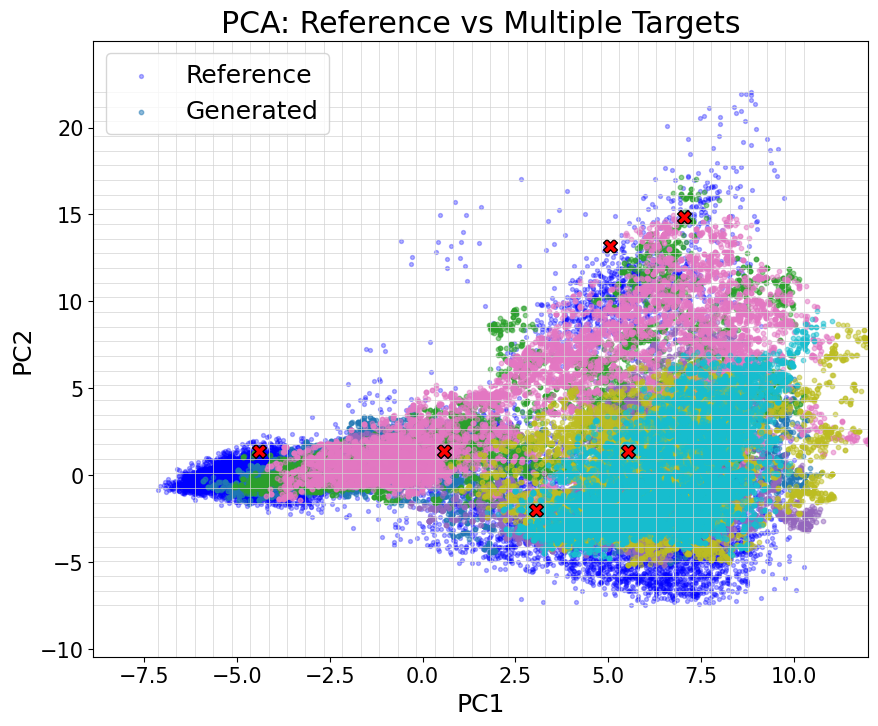

In [8]:
base_dir = os.getcwd() + "/generated_sequences_2Model_PCA_multiple_flatPCA_comp"
print(f"Loading sequences from {base_dir}")
gen_sequences_list, file_names = load_all_generated_sequences(base_dir)


target_coords_list = [(5, 10), (15, 10), (25, 10), (20, 6), (24, 24), (28, 26)]
trimmed_gen_sequences_list = []

for seq_array in gen_sequences_list:
    # Check if array has at least 2 dimensions and sequences along axis 1
    if seq_array.shape[1] > 1:
        trimmed_seq = seq_array[:, :-1]  # remove last column from each sequence
    else:
        trimmed_seq = seq_array  # leave as is if too small
    trimmed_gen_sequences_list.append(trimmed_seq)

plot_projected_pca_mult(
    sequences_reference=train_sequences,
    list_of_sequences_to_project=trimmed_gen_sequences_list,
    target_coords_list=target_coords_list,
    title="PCA: Reference vs Multiple Targets",
    max_pot=21,
    save_path=None,
    restrict_axes=True,
    Nbins=35,
    point_alpha=0.5,
)


Processing file: gen_seqs_randinit_Ns15000_b_1_b_PCA50PCA_comp.npy
gen_sequences shape: (15000, 64)


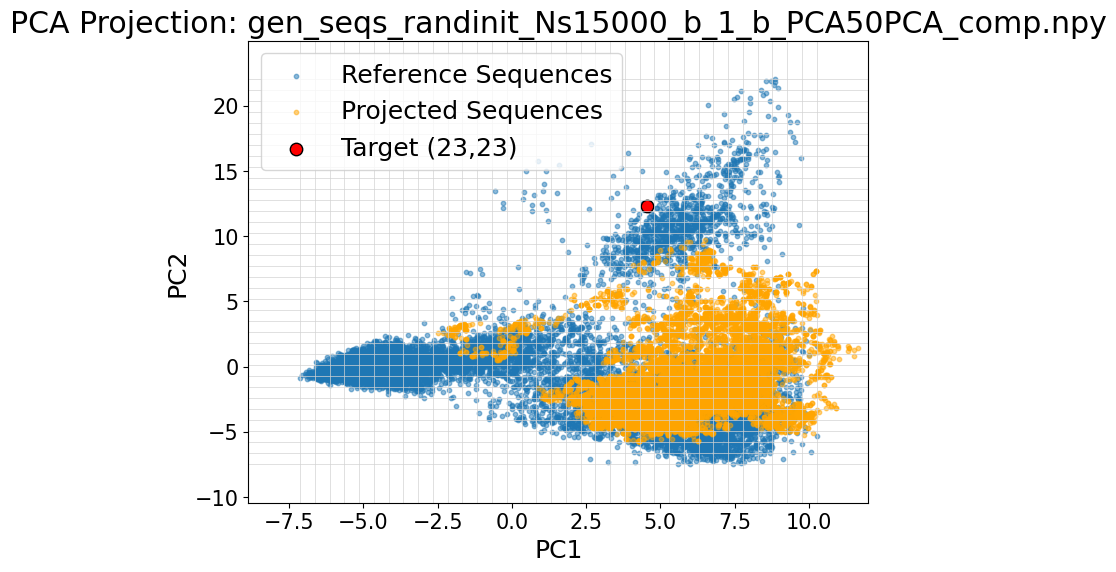


Processing file: gen_seqs_randinit_Ns15000_b_1_b_PCA20PCA_comp.npy
gen_sequences shape: (15000, 64)


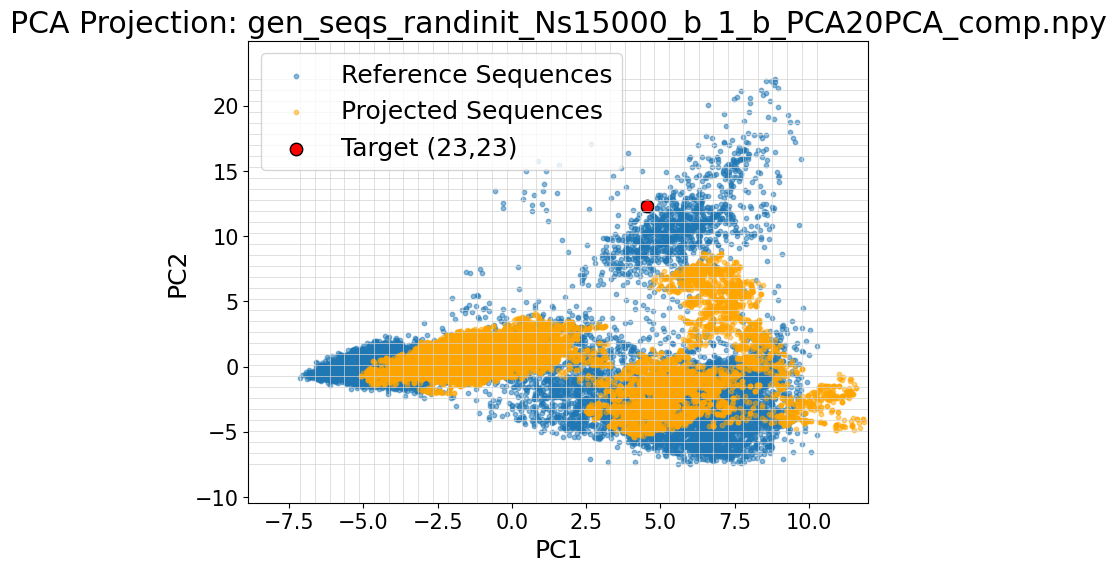


Processing file: gen_seqs_randinit_Ns15000_b1_b_PCA_1PCA_comp.npy
gen_sequences shape: (15000, 64)


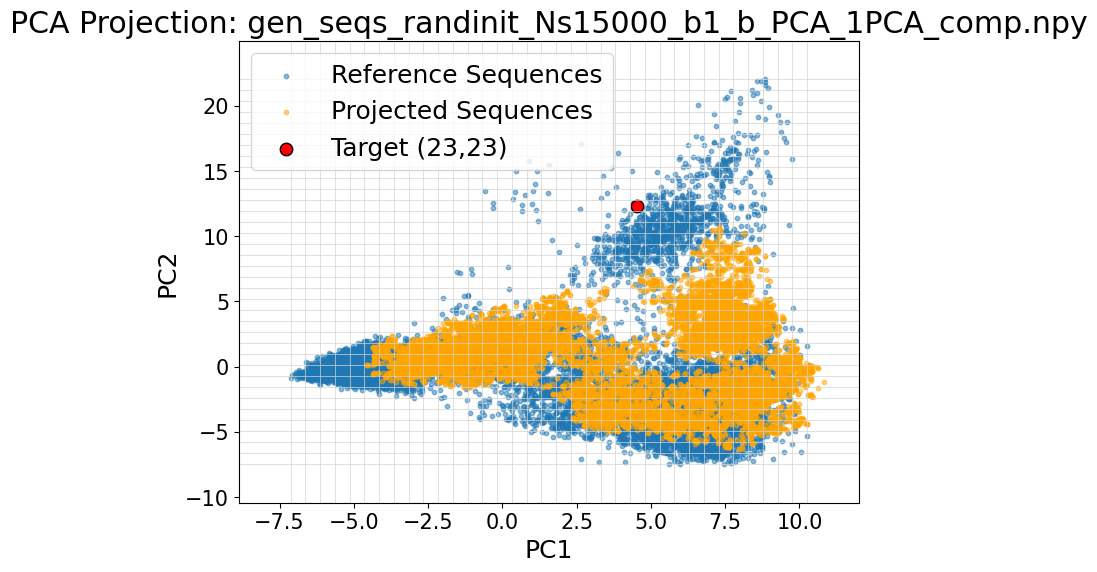


Processing file: gen_seqs_randinit_Ns15000_b_1_b_PCA100PCA_comp.npy
gen_sequences shape: (15000, 64)


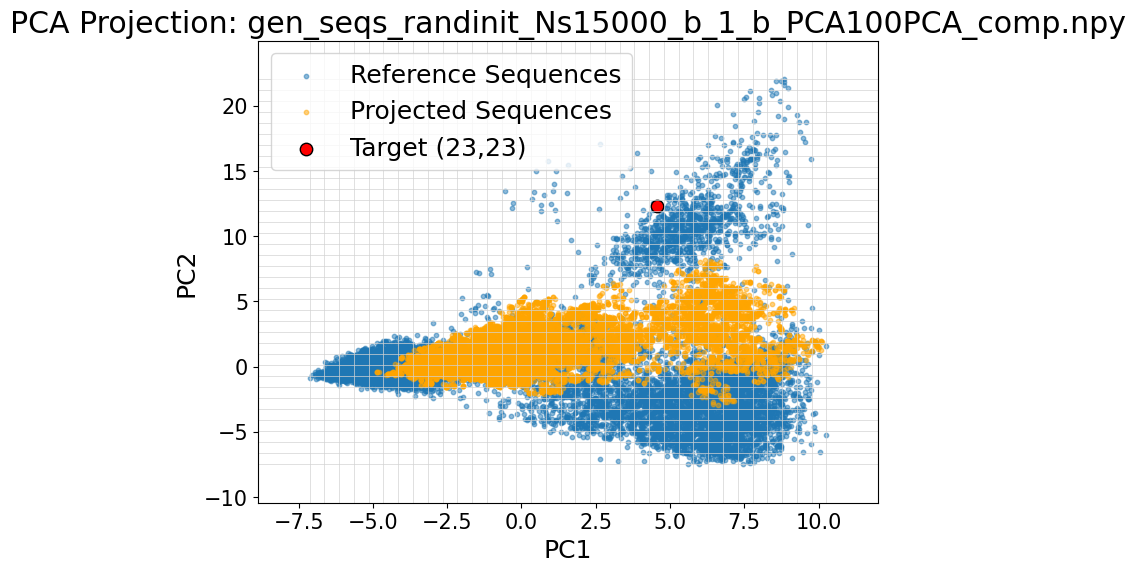


Processing file: gen_seqs_randinit_Ns15000_b_1_b_PCA100_c17_7PCA_comp.npy
gen_sequences shape: (15000, 64)


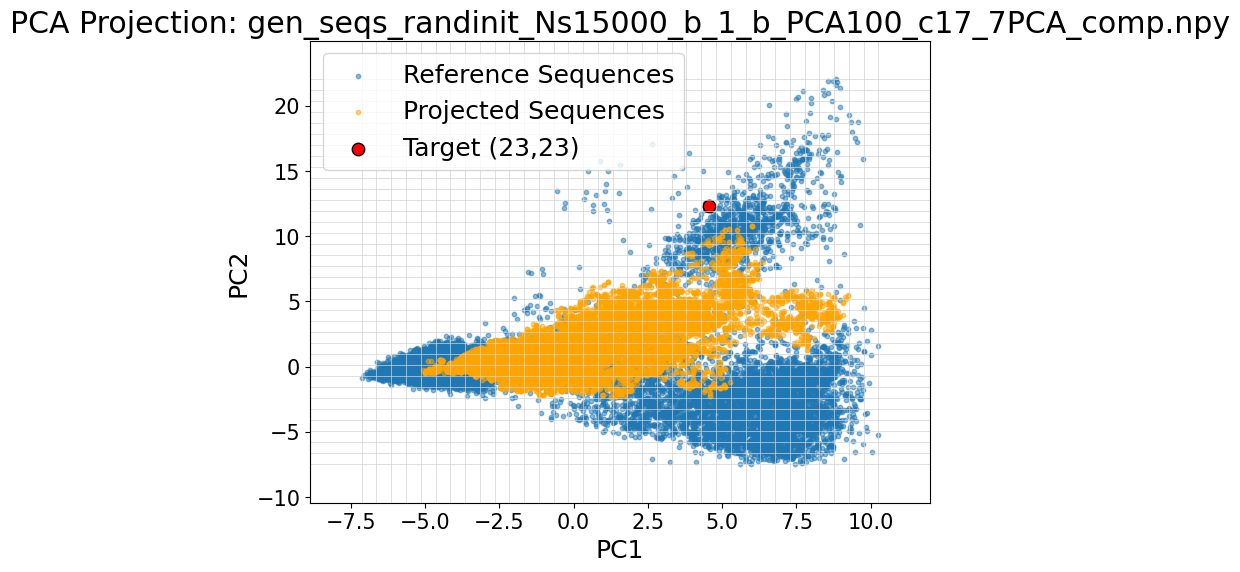


Processing file: gen_seqs_randinit_Ns15000_b2_b_PCA_1PCA_comp.npy
gen_sequences shape: (15000, 64)


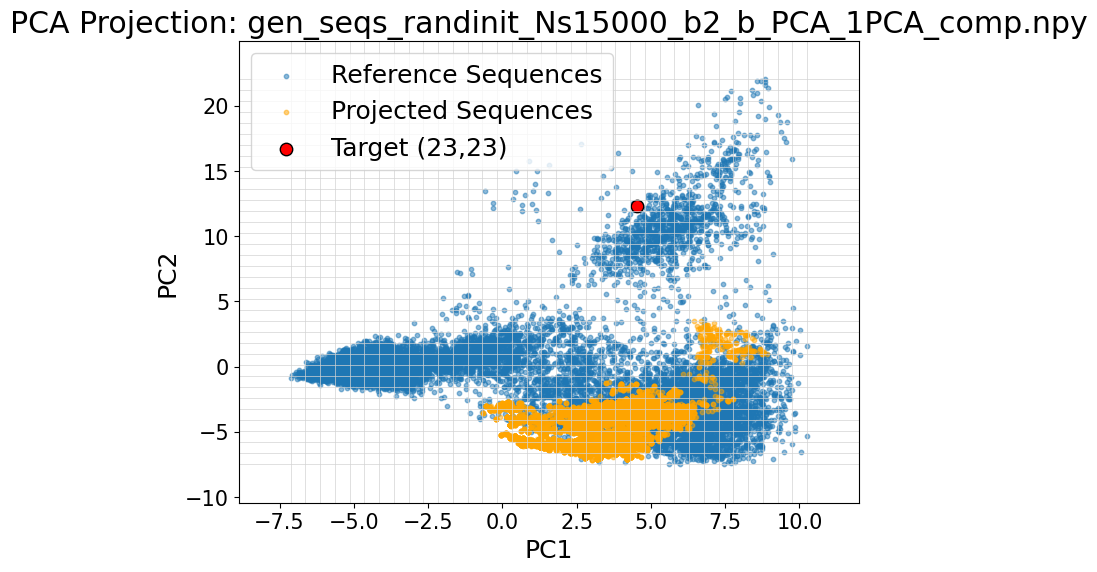


Processing file: gen_seqs_randinit_Ns15000_b_1_b_PCA0.01PCA_comp.npy
gen_sequences shape: (15000, 64)


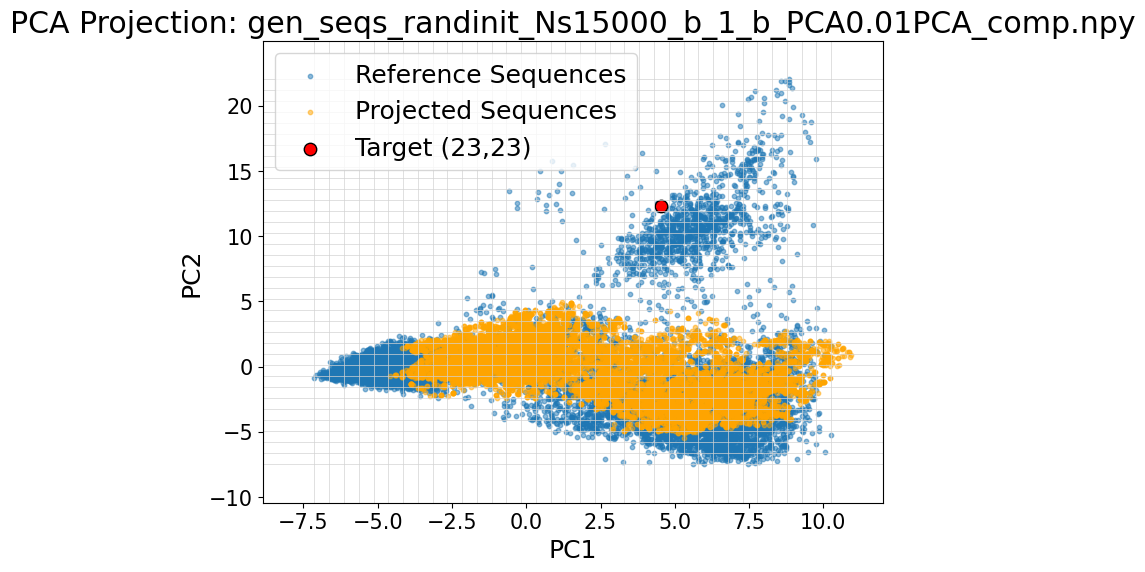


Processing file: gen_seqs_randinit_Ns15000_b0.01_b_PCA_1PCA_comp.npy
gen_sequences shape: (15000, 64)


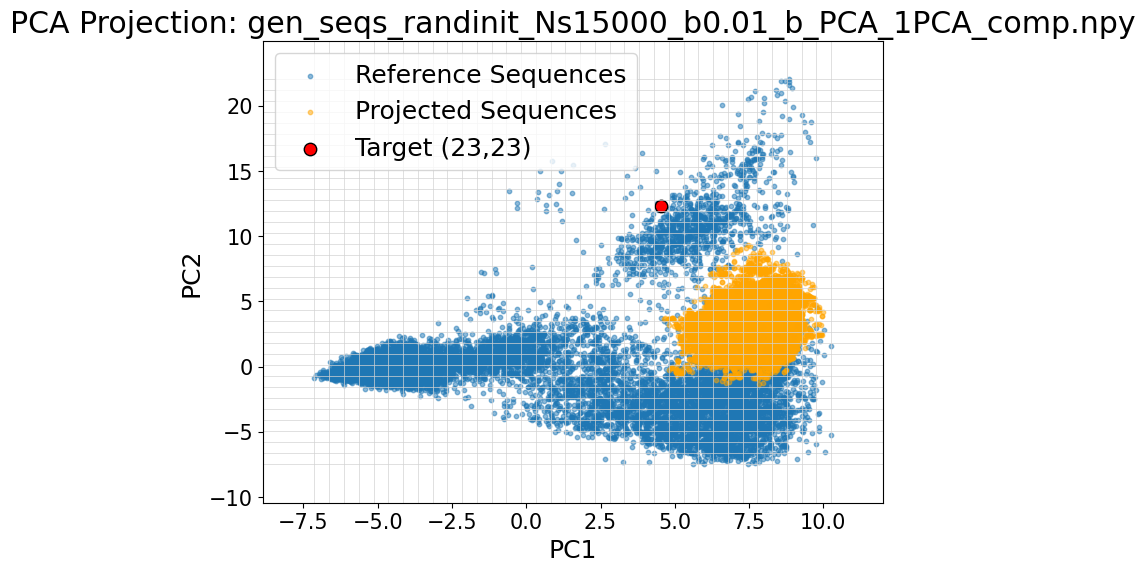


Processing file: gen_seqs_randinit_Ns15000_b0.5_b_PCA_1PCA_comp.npy
gen_sequences shape: (15000, 64)


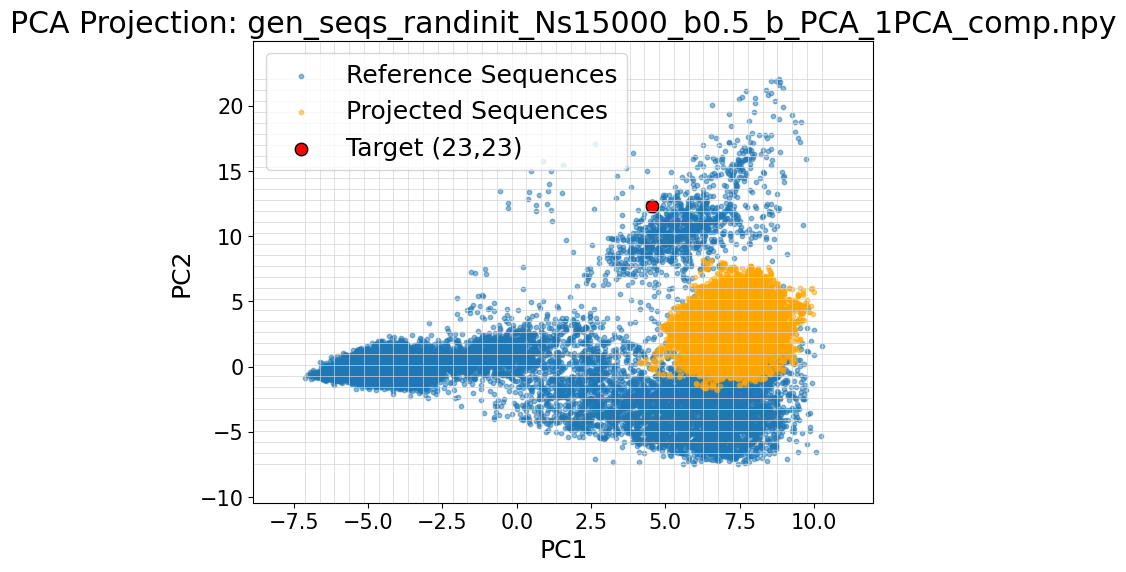


Processing file: gen_seqs_randinit_Ns15000_b10_b_PCA_1PCA_comp.npy
gen_sequences shape: (15000, 64)


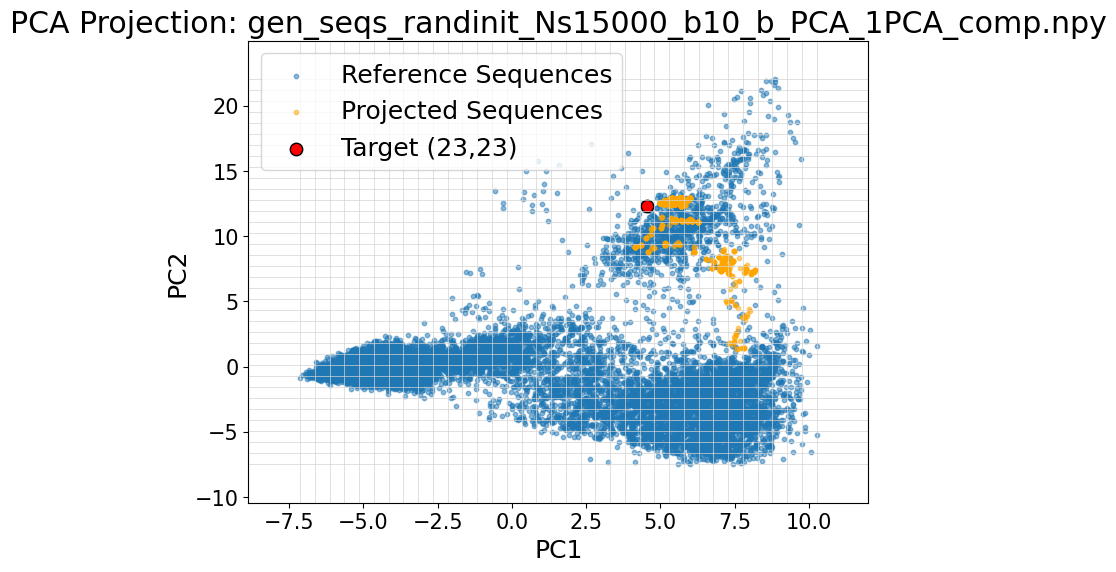


Processing file: gen_seqs_randinit_Ns15000_b_1_b_PCA1000_c17_7PCA_comp.npy
gen_sequences shape: (15000, 64)


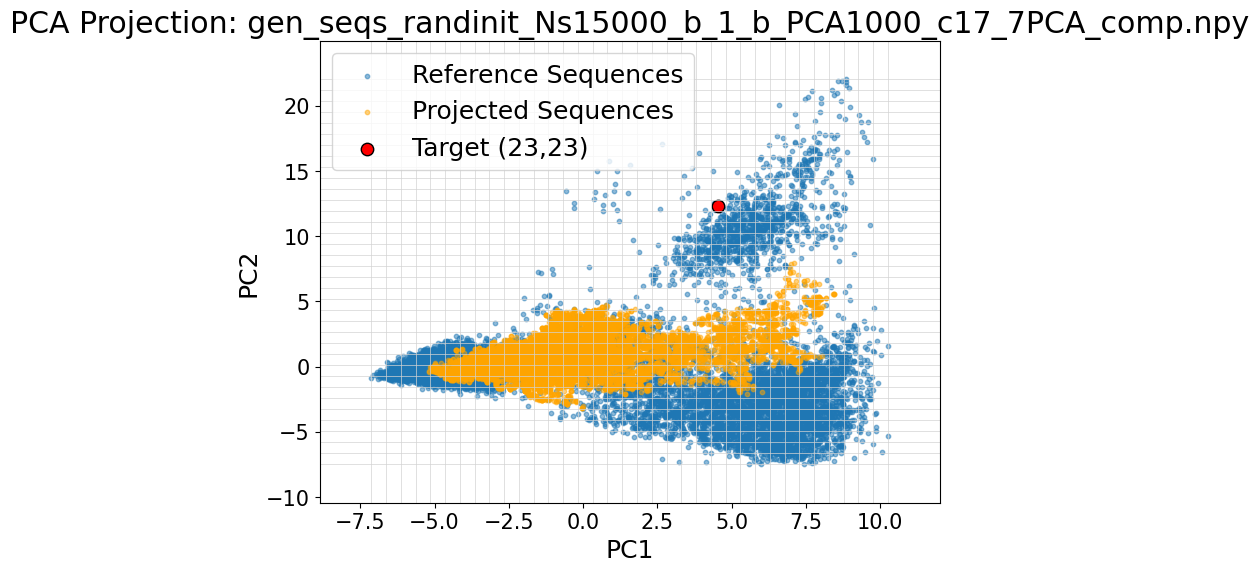


Processing file: gen_seqs_randinit_Ns15000_b_1_b_PCA50_c17_7PCA_comp.npy
gen_sequences shape: (15000, 64)


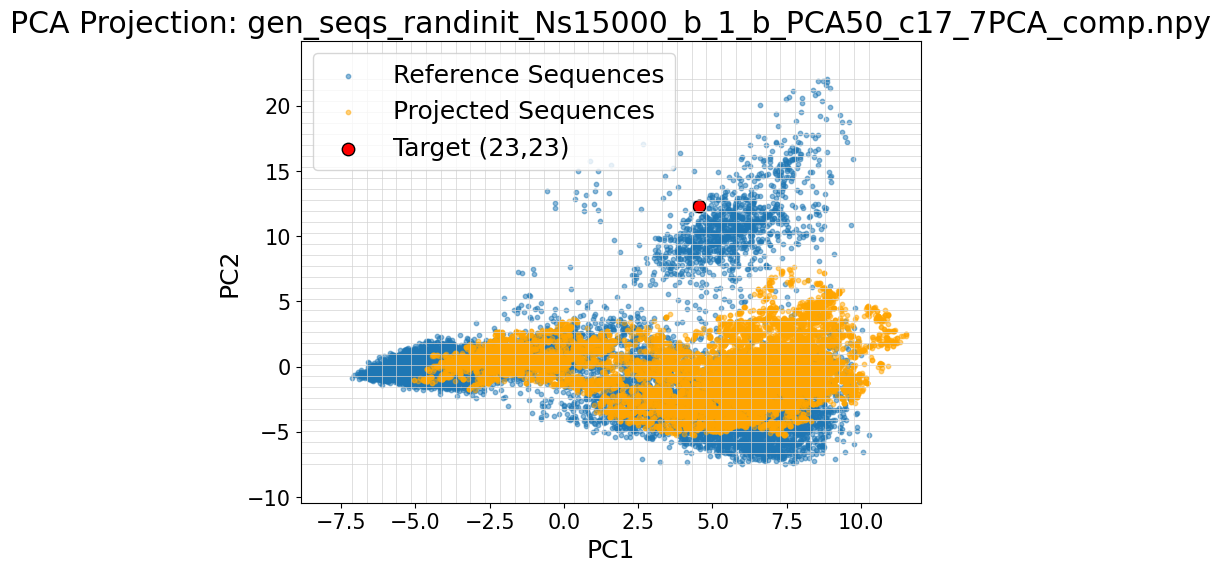


Processing file: gen_seqs_randinit_Ns15000_b_1_b_PCA2PCA_comp.npy
gen_sequences shape: (15000, 64)


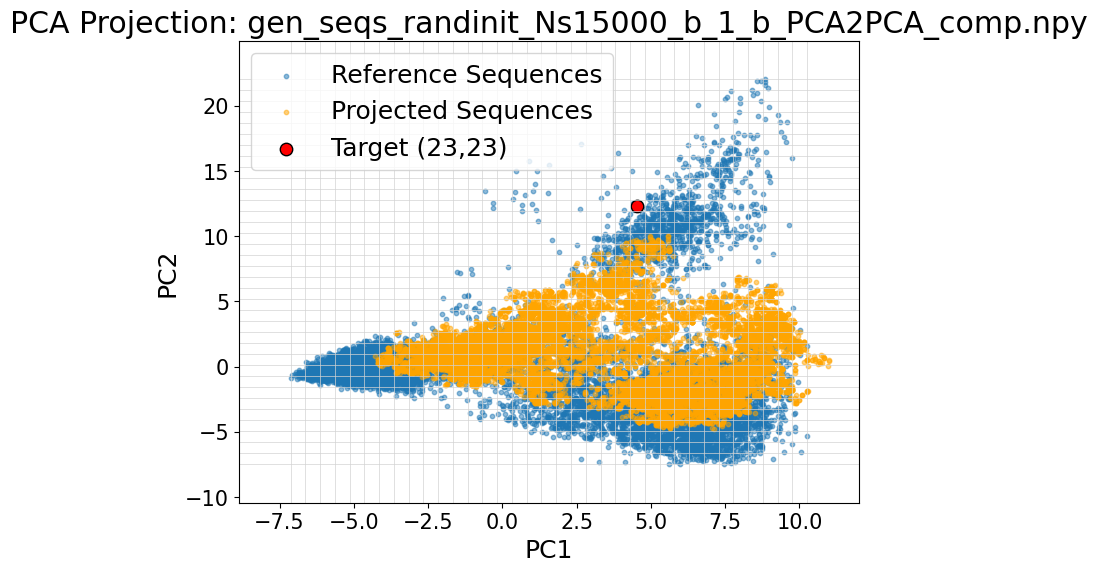


Processing file: gen_seqs_randinit_Ns15000_b_1_b_PCA0.5PCA_comp.npy
gen_sequences shape: (15000, 64)


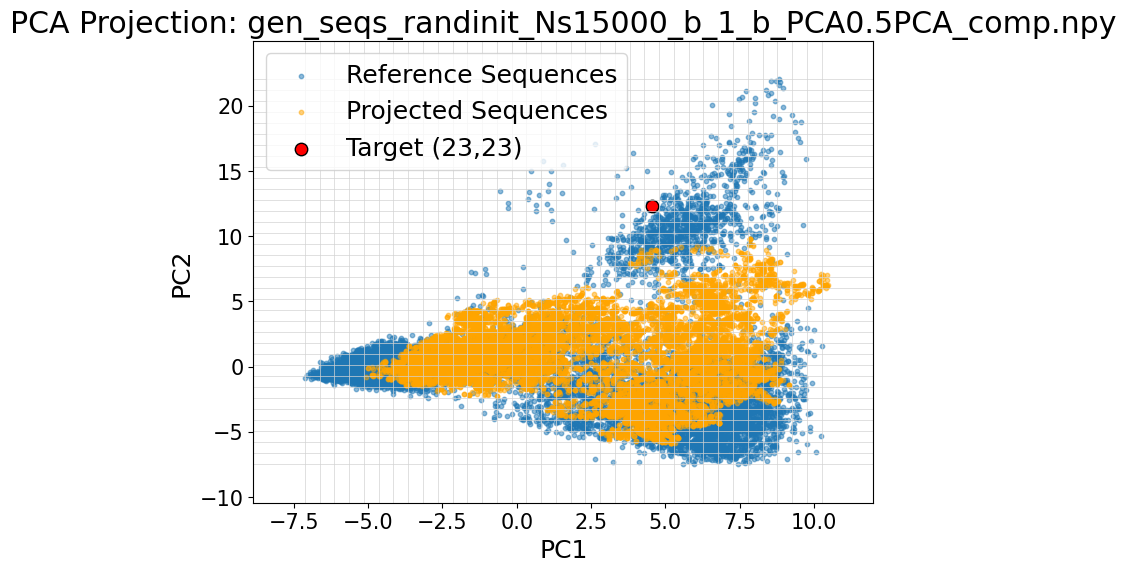


Processing file: gen_seqs_randinit_Ns15000_b_1_b_PCA10PCA_comp.npy
gen_sequences shape: (15000, 64)


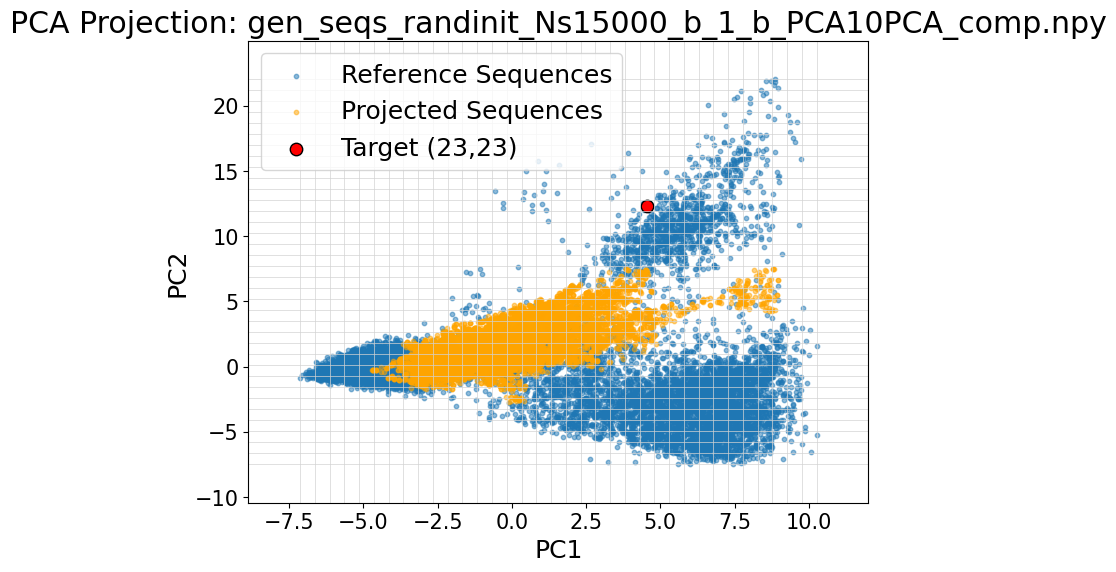

In [6]:
# ----- Paths -----
generated_dir = 'generated_sequences_2Model_PCA_flatPCA_comp'
cwd = os.getcwd()
full_gen_path = os.path.join(cwd, generated_dir)

# ----- Load train sequences -----
family = 'jdoms_bacteria_train2'
train_fasta_path = '/Users/marzioformica/Desktop/EPFL/Master/StageLBS/PCA_gen_AI/CODE/DataAttentionDCA/jdoms/' + family + '.fasta'

train_sequences = sequences_from_fasta(train_fasta_path)
train_sequences_num = [letters_to_nums(seq) for seq in train_sequences]

# ----- Loop through all .npy files in directory -----
for file in os.listdir(full_gen_path):
    if file.endswith('.npy'):
        print(f"\nProcessing file: {file}")
        
        # Load generated sequences
        file_path = os.path.join(full_gen_path, file)
        gen_sequences = np.load(file_path)
        L=63
        if gen_sequences.shape[1] > L:
            print(f"gen_sequences shape: {gen_sequences.shape}")
            target_coords = gen_sequences[0, -1:]  # Last two columns are PCA coords
            gen_sequences = gen_sequences[:, :-1]  # Remove last 2 cols if they are PCA coords
        else:
            target_coords = None
        # Optional: slice if needed
        # gen_sequences = gen_sequences[Ni:Nf]  # Uncomment if you want to subset

        # Extract target PCA coordinates from filename
        #match = re.findall(r'\d+\.\d+|\d+', file)  # Captures floats or ints
        #if len(match) >= 2:
        #    target_coords = np.array([float(match[-2]), float(match[-1])])
        #else:
        #    print("Warning: Could not extract PCA coords from filename.")
        #    target_coords = None
        target_coords = np.array([23, 23])  # Example coordinates for PCA
        # Plot PCA projection
        title = f"PCA Projection: {file}"
        plot_projected_pca(
            sequences_reference=train_sequences,
            sequences_to_project=gen_sequences,
            title=title,
            Nbins=35,
            target_coords=target_coords
        )